In [1]:
import numpy as np
import scipy as sp
from scipy import optimize
from scipy import signal
import matplotlib.pylab as plt
import pandas as pd

### Defining 10 day time series by seconds

In [2]:
x = np.arange(0, 10*60*60*24)

### Defining the linear trend

In [3]:
n = 0.1/(60*60*24)
m = 0
linear_trend = x*n + m

### Defining the cycles

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


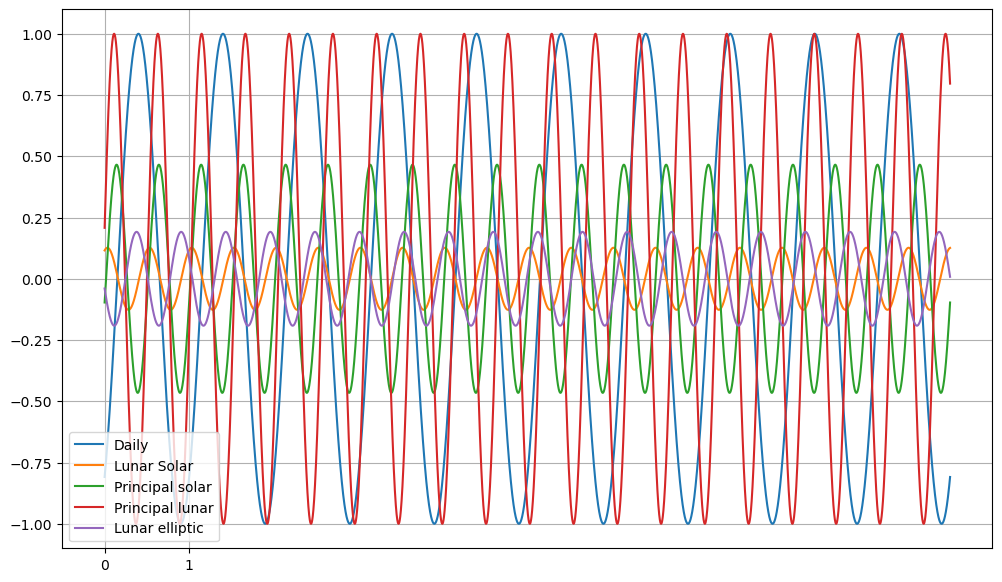

In [4]:
# Semidirunal 
f_1 = 1 # 1 Zyklus pro Tag / cycles per day (cpd)
f_lunarsolar = 2.005
f_solar = 2.
f_lunar = 1.932
f_ellipticlunar = 1.896

f_list = np.array([f_1, f_lunarsolar, f_solar, f_lunar, f_ellipticlunar])

A_lunarsolar = 0.1267 # Amplitude normiert mit M2
A_solar = 0.4656
A_lunar = 1
A_ellipticlunar = 0.1915

A_list = np.array([1, A_lunarsolar, A_solar, A_lunar, A_ellipticlunar])

variable_list = ["daily","lunar_solar", "principal_solar", "principal_lunar", "lunar_elliptic"]
label_list = ["Daily","Lunar Solar", "Principal solar", "Principal lunar", "Lunar elliptic"]




whole_array = np.zeros(shape=(len(f_list), len(x)))

fig, ax = plt.subplots(1, figsize=(12,7))

for i in range(len(f_list)):
    
    white_noise = np.random.normal(0,0.05,size=len(x))
    white_noise_phase = np.random.randint(low=-30, high=30)/30
    
    y = A_list[i] * np.sin((x)*(2*np.pi)*f_list[i]/(60*60*24)+white_noise_phase*np.pi) 
    + white_noise + linear_trend
    
    locals()[variable_list[i]] = y 
    whole_array[i] = y
    
    ax.plot(x/(60*60*24), y, label=label_list[i])
    
ax.legend()

sum_time_series = np.sum(whole_array, axis=0)

ax.set_xticks(np.arange(0,2,1))
ax.grid()

#fig.savefig('Output/1_Overview_clean.pdf', dpi=300)

C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\1936354901.py:56: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig('Output/2_Overview_noise_trend.pdf',dpi=300)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


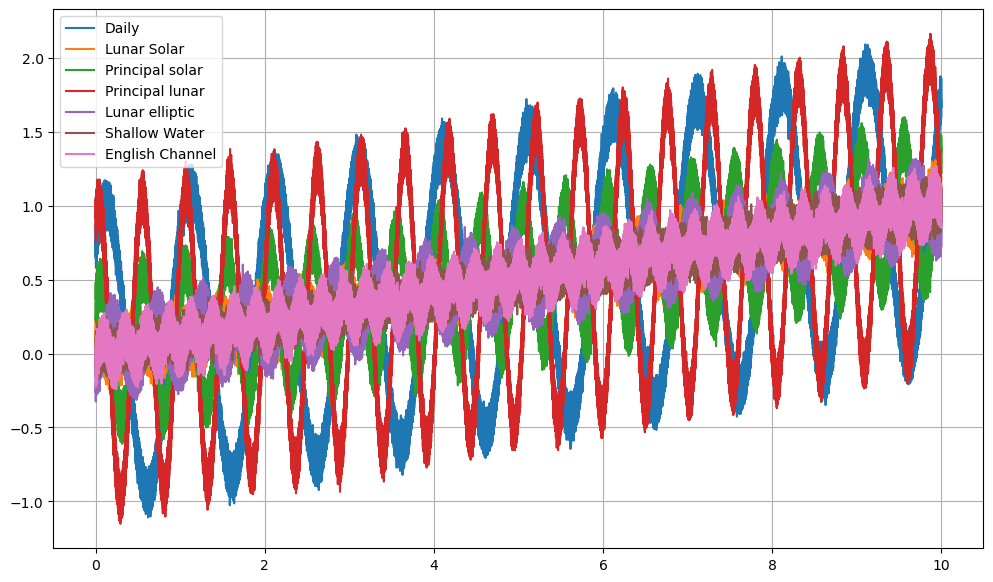

In [5]:
# Semidirunal 
f_1 = 1 # Zyklus pro Tag / cycles per day (cpd)
f_lunarsolar = 2.005
f_solar = 2.
f_lunar = 1.932
f_ellipticlunar = 1.896

# short period
f_shallow_water   = 3.809
f_english_channel = 3.865

f_list = np.array([f_1, f_lunarsolar, f_solar, f_lunar, f_ellipticlunar, 
                   f_shallow_water, f_english_channel])

A_lunarsolar = 0.1267 # Amplitude normiert mit M2
A_solar = 0.4656
A_lunar = 1
A_ellipticlunar = 0.1915

A_shallow_water   = 0.0297
A_english_channel = 0.1

A_list = np.array([1, A_lunarsolar, A_solar, A_lunar, A_ellipticlunar, 
                   A_shallow_water, A_english_channel])

variable_list = ["daily","lunar_solar", "principal_solar", "principal_lunar", "lunar_elliptic",
                "shallow_water", "english_channel"]

label_list = ["Daily","Lunar Solar", "Principal solar", "Principal lunar", "Lunar elliptic",
             "Shallow Water", "English Channel"]




whole_array = np.zeros(shape=(len(f_list), len(x)))

fig, ax = plt.subplots(1, figsize=(12,7))

for i in range(len(f_list)):
    
    white_noise = np.random.normal(0,0.05,size=len(x))  # 0.05 Standard deviation
    white_noise_phase = np.random.randint(low=-30, high=30)/30
    
    y = A_list[i] * np.sin((x)*(2*np.pi)*f_list[i]/(60*60*24)+white_noise_phase*np.pi) + white_noise + linear_trend
    
    locals()[variable_list[i]] = y 
    whole_array[i] = y
    
    ax.plot(x/(60*60*24), y, label=label_list[i])
    
ax.legend()
ax.grid()

sum_time_series = np.sum(whole_array, axis=0)

#fig.savefig('Output/2_Overview_noise_trend.pdf',dpi=300)

## Defining the filter

In [6]:
sec = 1 #SAMPLING RATE IN SEC
high_freq_hour = 0.5
low_freq_hour  = 30
high_freq = 1/(high_freq_hour*60*sec) 
low_freq  = 1/(low_freq_hour*60*sec)  

sos = signal.butter(10, [low_freq], 'lowpass', output='sos')

In [7]:
filtered_list = ["filtered_1", "filtered_lunarsolar", "filtered_lunar", 
                 "filtered_solar", "filtered_ellipticlunar", "filtered_shallowwater",
                "filtered_englchannel"]

fig, ax = plt.subplots(1, figsize=(12,7))

for i in range(len(f_list)):
    
    locals()[filtered_list[i]] = signal.sosfilt(sos, locals()[variable_list[i]])
    
    ax.plot(x/(60*60*24), locals()[filtered_list[i]], label=label_list[i]+" filtered")
    
ax.legend()
ax.set_title('Signals filtered 0.5 & 30 hour')
#fig.savefig('Output/3_Overview_filtered.pdf',dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [8]:
fig, axes = plt.subplots(len(f_list), figsize=(12,25))

for i in range(len(f_list)):
    
    ax = axes[i]
    
    X = np.fft.fft(locals()[filtered_list[i]])
    N = len(X)
    n = np.arange(N)
    # get the sampling rate
    sr = 1
    T = N/sr
    freq = n/T 

    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    t_h = (1/f_oneside)/(60*60)
    
    f_fftfreq = np.sort(np.fft.fftfreq(N))[int(N/2):]
    t_h = (1/f_fftfreq)/(60*60)
    
    X_unfiltered = np.fft.fft(locals()[variable_list[i]])
    
    ax.plot(t_h, np.abs(X[:n_oneside])/n_oneside, "x", label= 'filtered')
    ax.plot(t_h, np.abs(X_unfiltered[:n_oneside])/n_oneside, "x", label='unfiltered')
    ax.set_xlabel('Period [$hour$]')
    ax.grid()
    ax.set_ylim(0,1)
    ax.set_xlim(0,50)
    ax.set_xticks(np.arange(0,50,2))
    ax.legend()
    
    ax.set_ylabel(label_list[i])
    
#fig.savefig('Output/4_fft_noise_and_filtered_low.pdf')

C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\1327027359.py:20: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_oneside)/(60*60)
C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\1327027359.py:23: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_fftfreq)/(60*60)


# Sum Signal with Amplitudes

C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\580102069.py:32: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_oneside)/(60*60)
C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\580102069.py:35: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_fftfreq)/(60*60)


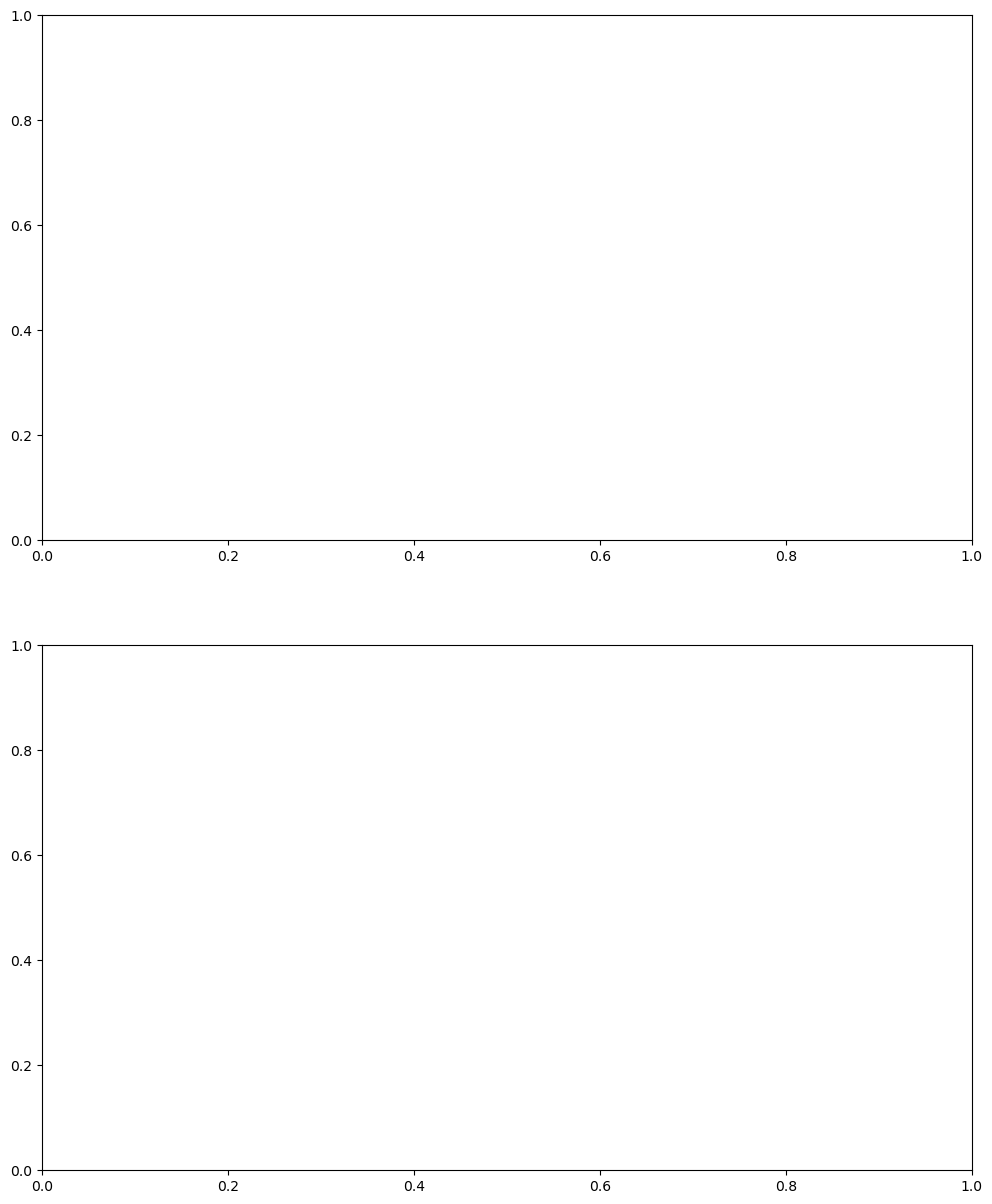

In [9]:
sum_time_series_filtered = signal.sosfilt(sos, sum_time_series)


fig, ax = plt.subplots(2, figsize=(12,15))


ax = axes[0]
ax.plot(x/(60*60*24), sum_time_series, label = 'Raw sum')
ax.plot(x/(60*60*24), sum_time_series_filtered, label = 'Filtered')

ax.set_xlabel('Days')
ax.set_ylabel('Summed Amplitude')
ax.grid()
ax.set_title(r'$\sum$'+','.join(label_list))
ax.legend()



X = np.fft.fft(sum_time_series_filtered)
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

t_h = (1/f_oneside)/(60*60)

f_fftfreq = np.sort(np.fft.fftfreq(N))[int(N/2):]
t_h = (1/f_fftfreq)/(60*60)

X_unfiltered = np.fft.fft(sum_time_series)


ax = axes[1]
ax.plot(t_h, np.abs(X[:n_oneside])/n_oneside, "x", label= 'filtered')
ax.plot(t_h, np.abs(X_unfiltered[:n_oneside])/n_oneside, "x", label='raw')
ax.set_xlabel('Period [$hour$]')
ax.grid()
ax.set_ylim(0,1)
ax.set_xlim(0,50)
ax.set_xticks(np.arange(0,50,2))
ax.legend()

ax.set_ylabel('Amplitude')
#fig.savefig('Output/5_total_signal.pdf',dpi=300)

C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\1289210419.py:16: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_oneside)/(60*60)
C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\1289210419.py:19: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_fftfreq)/(60*60)


Text(0, 0.5, 'Amplitude')

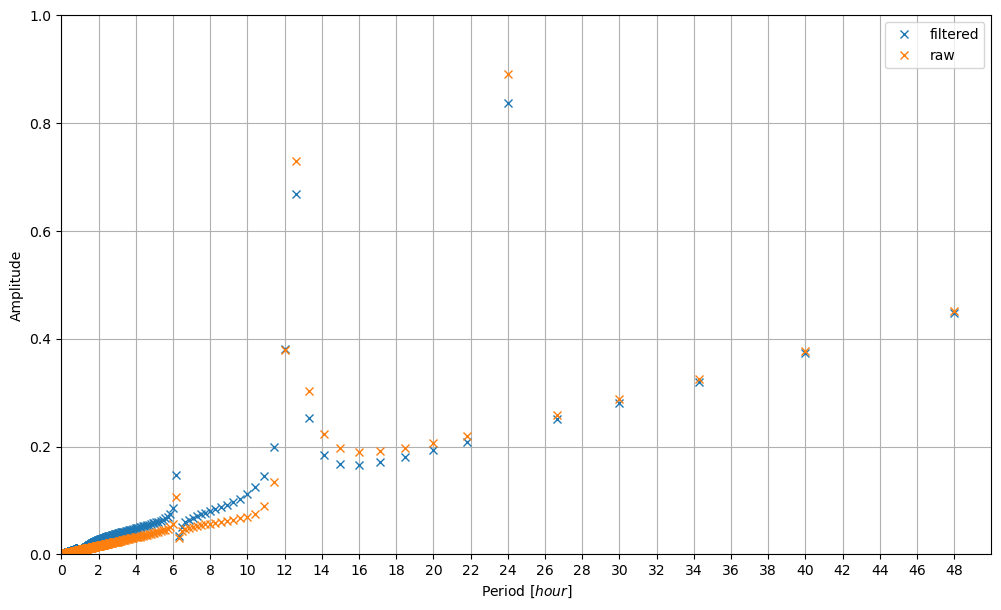

In [10]:
fig, ax = plt.subplots(1, figsize=(12,7))

X = np.fft.fft(sum_time_series_filtered)
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

t_h = (1/f_oneside)/(60*60)

f_fftfreq = np.sort(np.fft.fftfreq(N))[int(N/2):]
t_h = (1/f_fftfreq)/(60*60)

X_unfiltered = np.fft.fft(sum_time_series)

ax.plot(t_h, np.abs(X[:n_oneside])/n_oneside, "x", label= 'filtered')
ax.plot(t_h, np.abs(X_unfiltered[:n_oneside])/n_oneside, "x", label='raw')
ax.set_xlabel('Period [$hour$]')
ax.grid()
ax.set_ylim(0,1)
ax.set_xlim(0,50)
ax.set_xticks(np.arange(0,50,2))
ax.legend()

ax.set_ylabel('Amplitude')

#fig.savefig('Output/6_fft_total_signal.pdf',dpi=300)

# 1 3 10 50 & 100 Day
### Base Signal with linear trend

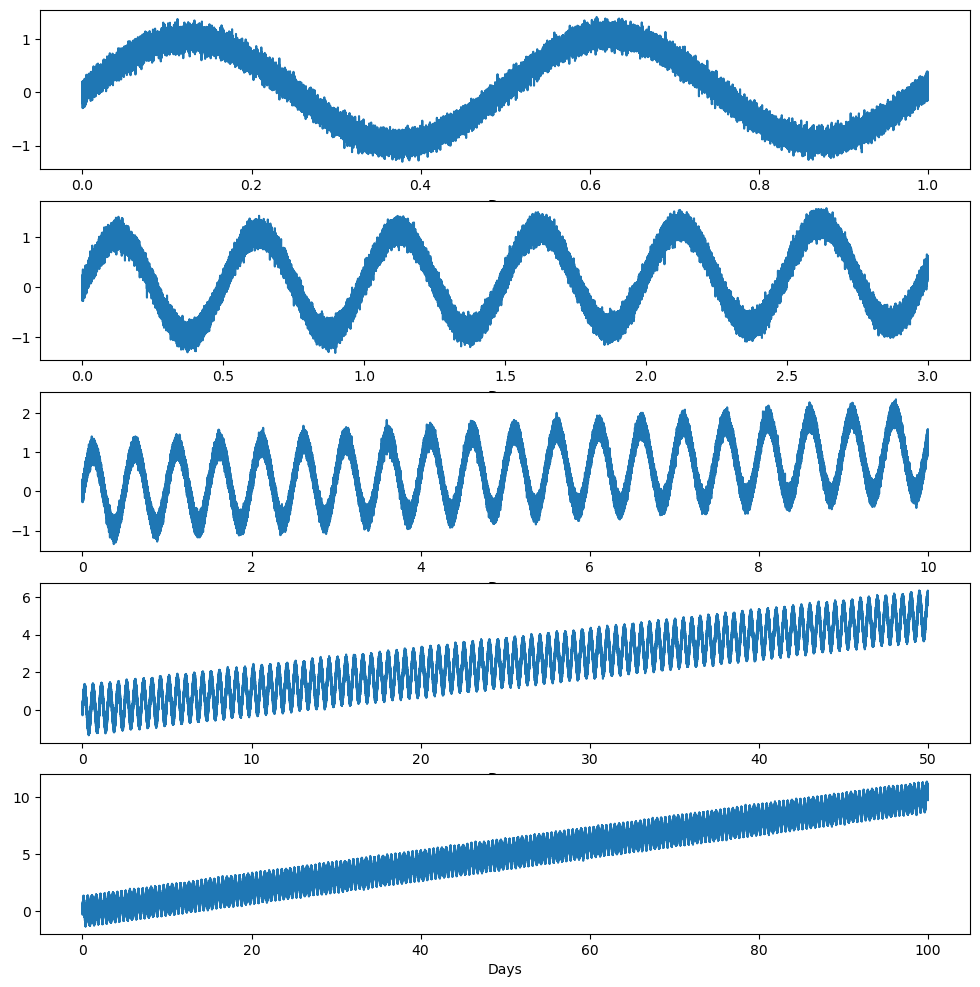

In [11]:
x_0 = np.arange(0, 1*60*60*24) 
x_1 = np.arange(0, 3*60*60*24)
x_2 = np.arange(0, 10*60*60*24)
x_3 = np.arange(0, 50*60*60*24)
x_4 = np.arange(0, 100*60*60*24)

x_list = [x_0, x_1, x_2, x_3, x_4]
label_list_x = ["day_1", "day_3", "day_10", "day_50", "day_100"]


n = 0.1/(60*60*24)
m = 0


fig, axes = plt.subplots(len(x_list), figsize=(12,12))

for i in range(len(x_list)):
    
    linear_trend = x_list[i]*n + m
    
    white_noise = np.random.normal(0,0.1,size=len(x_list[i]))
    
    y = np.sin(x_list[i]*(2*np.pi)*f_list[1]/(60*60*24)) + white_noise + linear_trend
    
    locals()[label_list_x[i]] = y 
    
    ax = axes[i]
    ax.plot(x_list[i]/(60*60*24), y, label=label_list[i])
    ax.set_xlabel('Days')

#fig.savefig('Output/6_overview_length_variation.pdf',dpi=300)

C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\196815121.py:19: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_oneside)/(60*60)


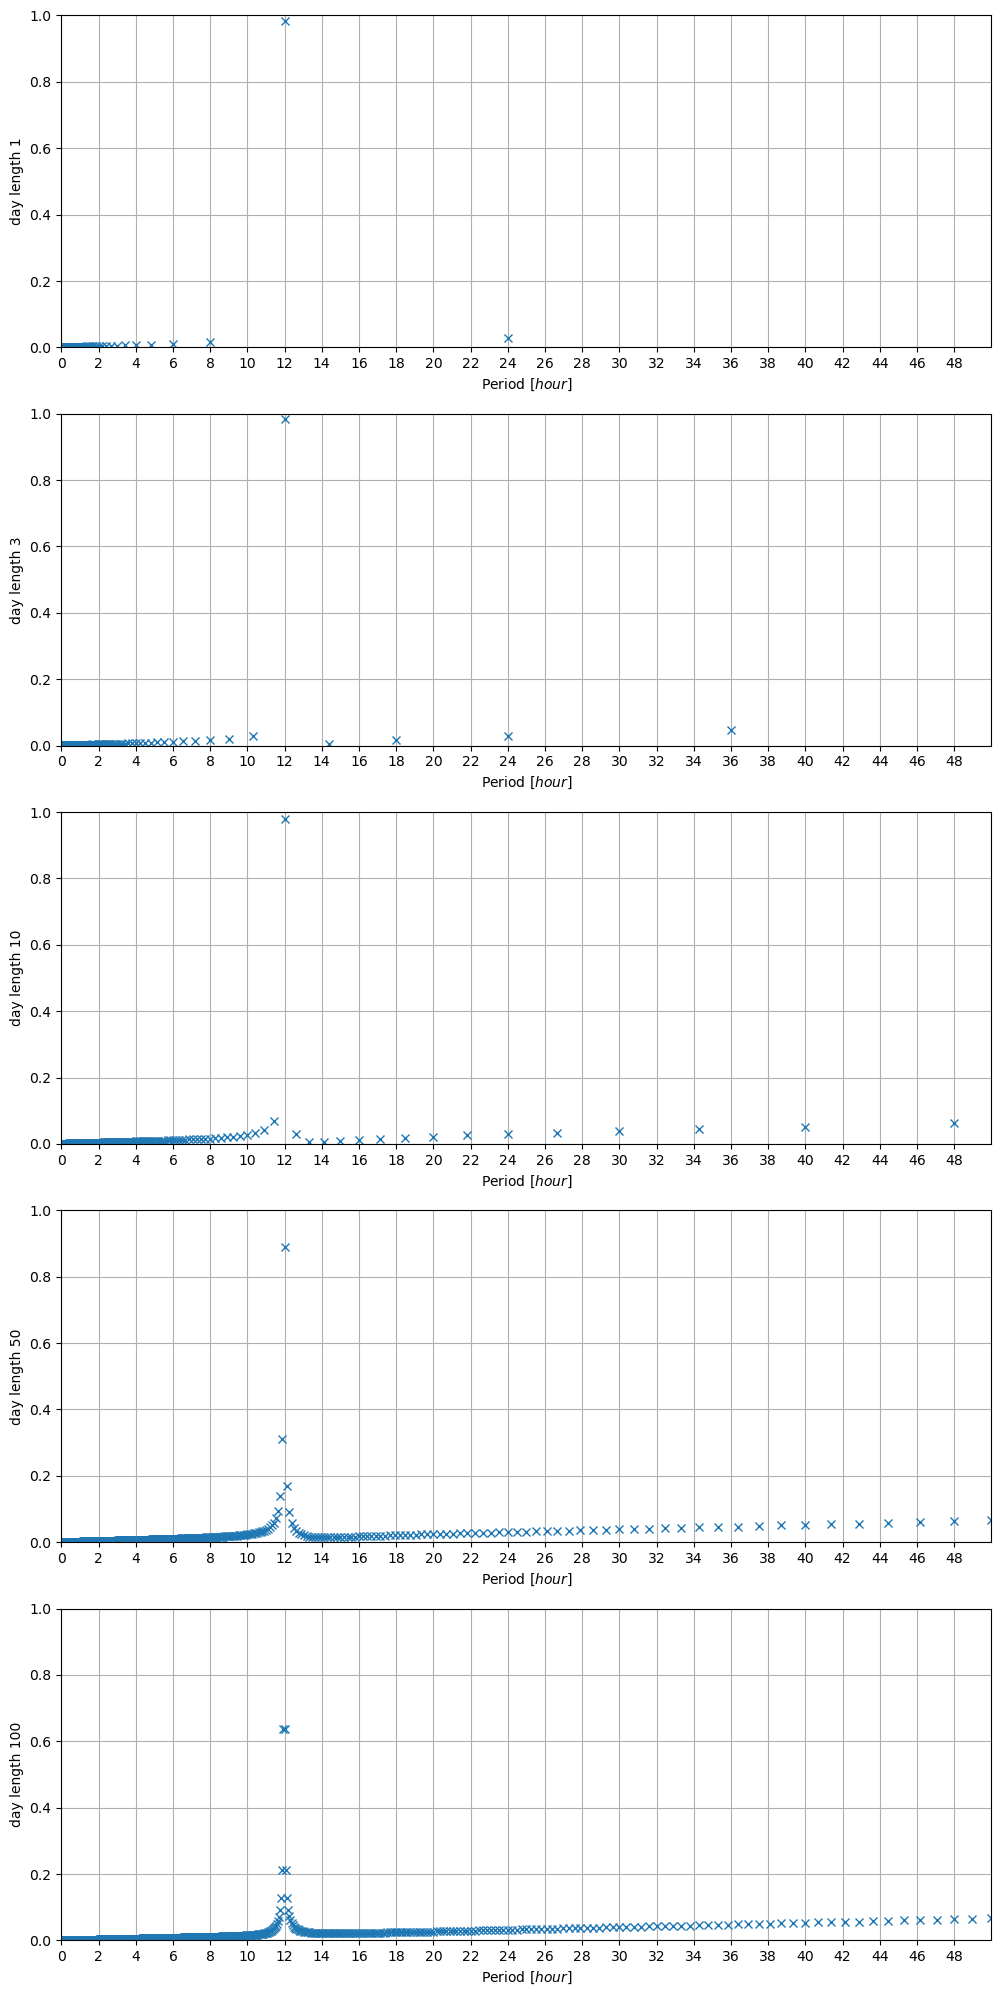

In [12]:
fig, axes = plt.subplots(len(label_list_x), figsize=(12,25))

for i in range(len(x_list)):
    
    ax = axes[i]
    
    X = np.fft.fft(locals()[label_list_x[i]])
    N = len(X)
    n = np.arange(N)
    # get the sampling rate
    sr = 1
    T = N/sr
    freq = n/T 

    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]
    t_h = (1/f_oneside)/(60*60)
    
    
    ax.plot(t_h, np.abs(X[:n_oneside])/n_oneside, "x")
    ax.set_xlabel('Period [$hour$]')
    ax.grid()
    ax.set_ylim(0,1)
    ax.set_xlim(0,50)
    ax.set_xticks(np.arange(0,50,2))
    
    ax.set_ylabel(label_list_x[i].replace('_',' length '))
    
#fig.savefig('Output/7_fft_length_variation.pdf',dpi=300)

C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\1850826067.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig('Output/3_Overview_filtered.pdf',dpi=300)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


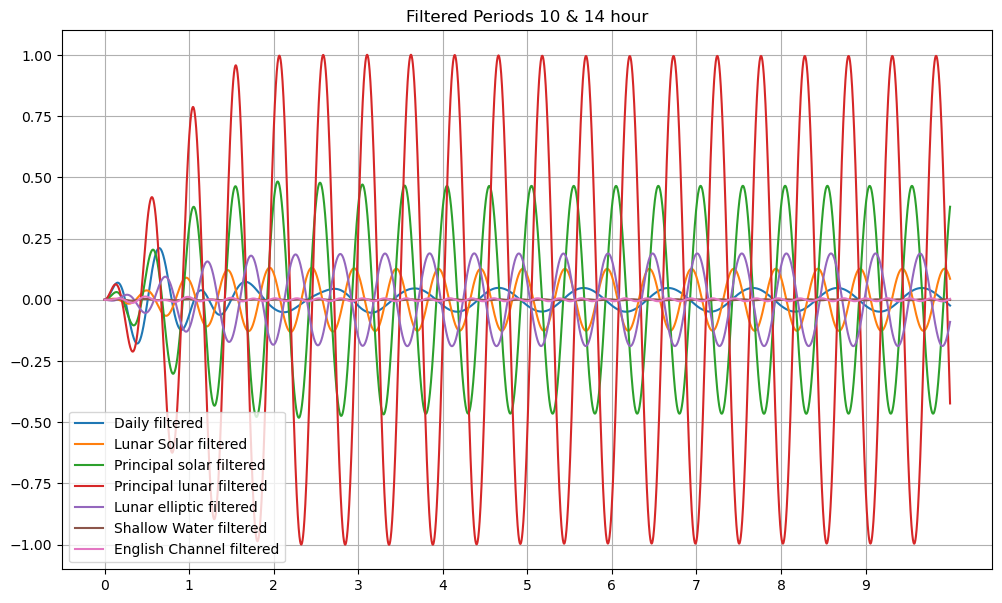

In [13]:
sec = 1 #SAMPLING RATE IN SEC
high_freq_hour = 5
low_freq_hour  = 7
high_freq = 1/(high_freq_hour*60*60*sec) 
low_freq  = 1/(low_freq_hour*60*60*sec)  

sos = signal.butter(2, [low_freq, high_freq], btype='bandpass', output='sos')

filtered_list = ["filtered_1", "filtered_lunarsolar", "filtered_lunar", 
                 "filtered_solar", "filtered_ellipticlunar", "filtered_shallowwater",
                "filtered_englchannel"]

fig, ax = plt.subplots(1, figsize=(12,7))

for i in range(len(f_list)):
    
    locals()[filtered_list[i]] = signal.sosfilt(sos, locals()[variable_list[i]])
    
    ax.plot(x/(60*60*24), locals()[filtered_list[i]], label=label_list[i]+" filtered")
    
ax.legend()
ax.set_xticks(np.arange(0,10,1))
ax.grid()
ax.set_title('Filtered Periods 10 & 14 hour')
#fig.savefig('Output/3_Overview_filtered.pdf',dpi=300)

C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\37649436.py:64: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_fftfreq)*sec/(60*60)


Text(0, 0.5, 'Amplitude')

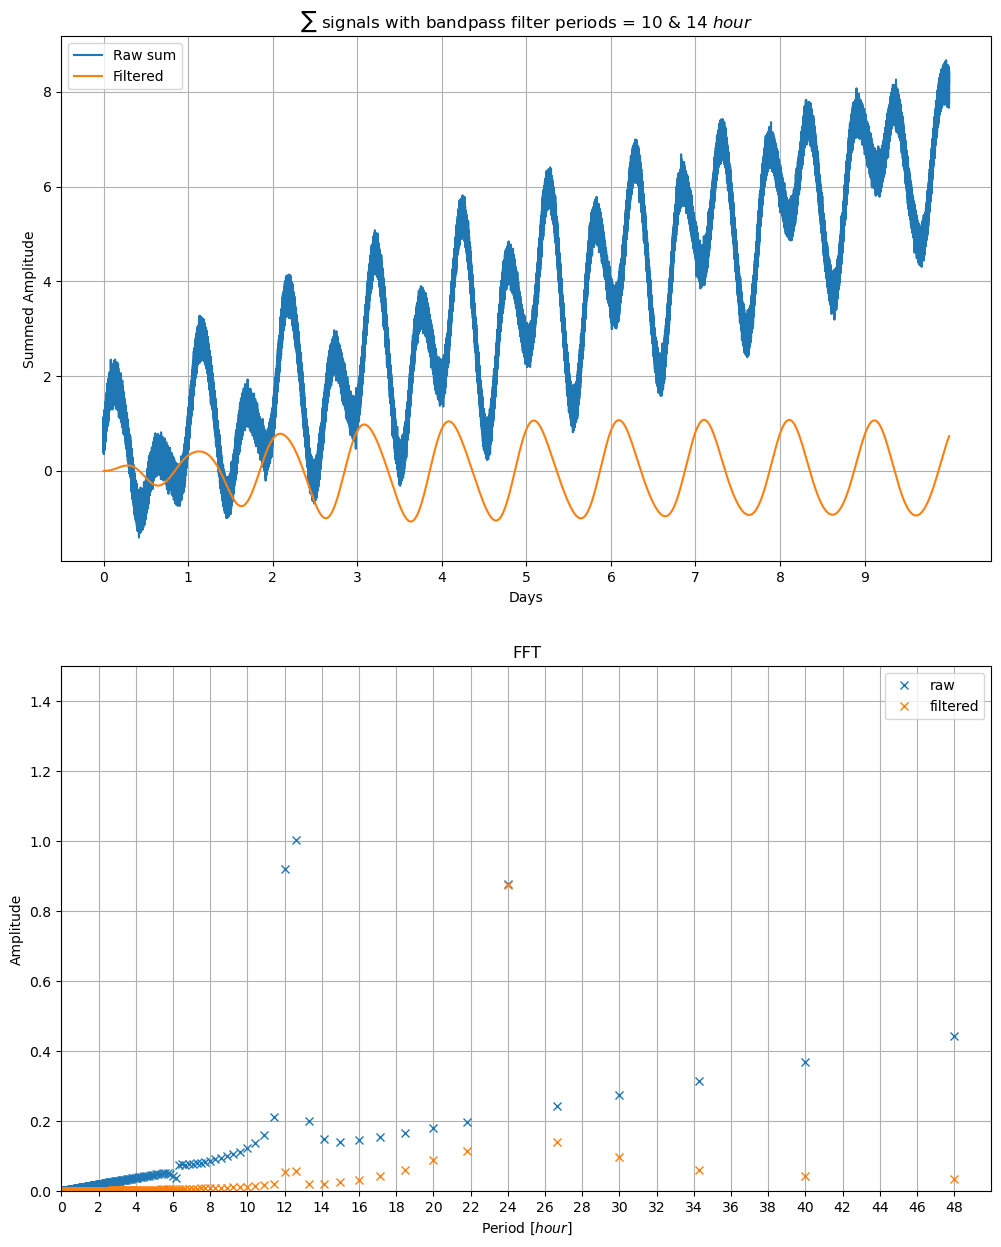

In [14]:
sec = 1 #SAMPLING RATE IN SEC
high_freq_hour = 10
low_freq_hour  = 14
high_freq = 1/(high_freq_hour*60*60*sec) 
low_freq  = 1/(low_freq_hour*60*60*sec)  

sos = signal.butter(2, [low_freq, high_freq], btype='bandpass', output='sos')

x = np.arange(0, 10*60*60*24,sec)
n = 0.1/(60*60*24)
m = 0
linear_trend = x*n + m
whole_array = np.zeros(shape=(len(f_list), len(x)))


for i in range(len(f_list)):
    
    white_noise = np.random.normal(0,0.05,size=len(x))  # 0.05 Standard deviation
    white_noise_phase = np.random.randint(low=-30, high=30)/30
    
    y = A_list[i] * np.sin((x)*(2*np.pi)*f_list[i]/(60*60*24)+white_noise_phase*np.pi) + white_noise + linear_trend
    whole_array[i] = y
    
sum_time_series = np.sum(whole_array, axis=0)


sum_time_series_filtered = signal.sosfilt(sos, sum_time_series)

# PLOT

fig, axes = plt.subplots(2, figsize=(12,15))

ax = axes[0]
ax.plot(x/(60*60*24), sum_time_series, label = 'Raw sum')
ax.plot(x/(60*60*24), sum_time_series_filtered, label = 'Filtered')

ax.set_xlabel('Days')
ax.set_ylabel('Summed Amplitude')
ax.set_title(r'$\sum$ signals with bandpass filter periods = {:} & {:} $hour$'.format(high_freq_hour,low_freq_hour))
ax.legend()
ax.set_xticks(np.arange(0,10,1))
ax.grid()


# FFT CALCULATE

X_raw = np.fft.fft(sum_time_series)
X_filtered = np.fft.fft(sum_time_series_filtered)


N = len(X_raw)
n = np.arange(N)
# get the sampling rate
sr = 1/sec
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

f_fftfreq = np.sort(np.fft.fftfreq(N))[int(N/2):]
t_h = (1/f_fftfreq)*sec/(60*60)

#FFT PLOT

ax = axes[1]
ax.plot(t_h, np.abs(X_raw[:n_oneside])/n_oneside, "x", label='raw')
ax.plot(t_h, np.abs(X_filtered[:n_oneside])/n_oneside, "x", label= 'filtered')
ax.set_xlabel('Period [$hour$]')
ax.grid()
ax.set_ylim(0,1.5)
ax.set_xlim(0,50)
ax.set_xticks(np.arange(0,50,2))
ax.legend()
ax.set_title('FFT')
ax.set_ylabel('Amplitude')



#fig.savefig('Output/5_total_signal_bandpass.pdf',dpi=300)

## Sampling Rate

C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\2338796513.py:82: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_fftfreq)*SAMPLING_RATE/(60*60)


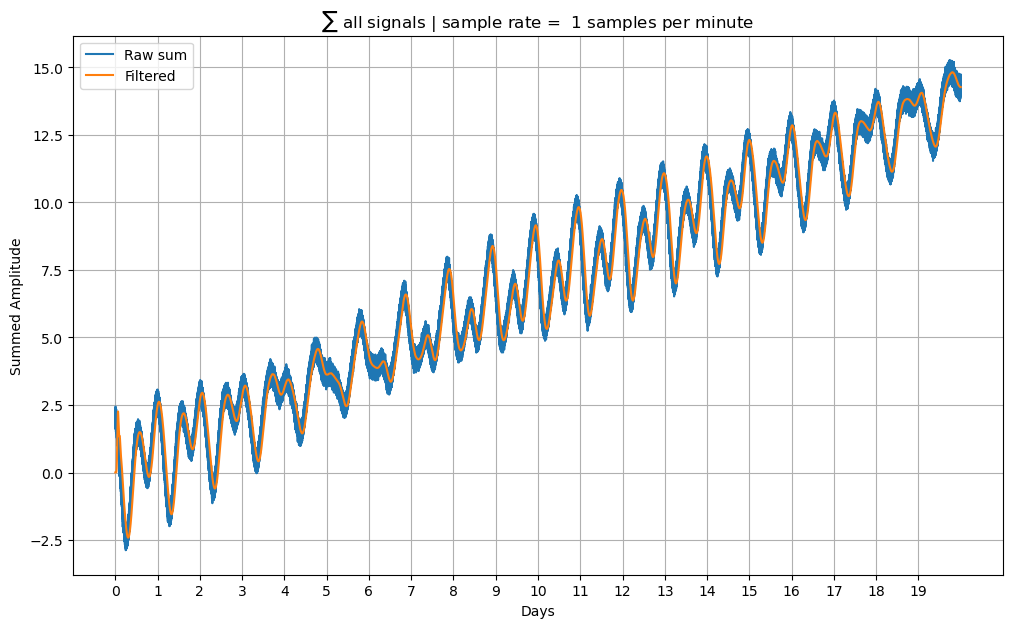

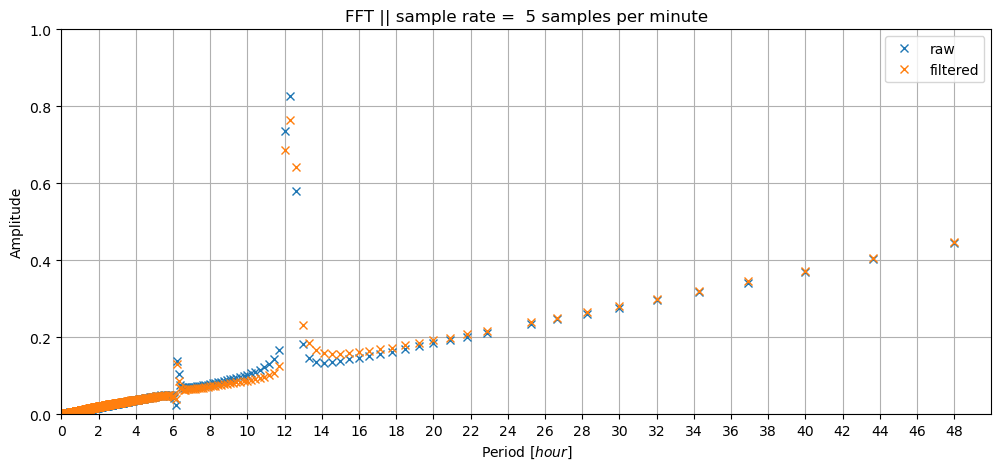

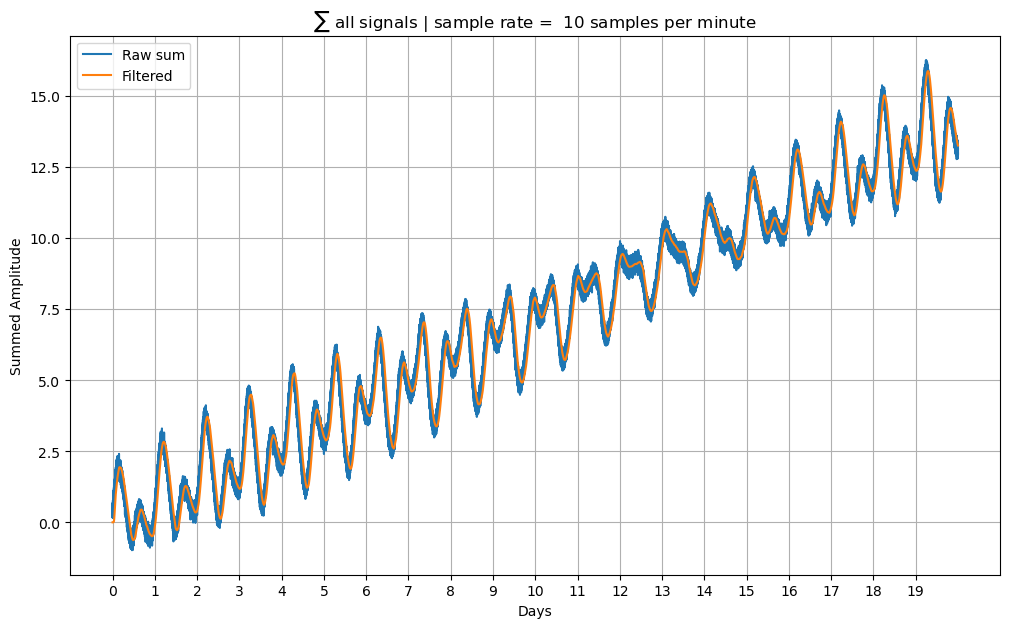

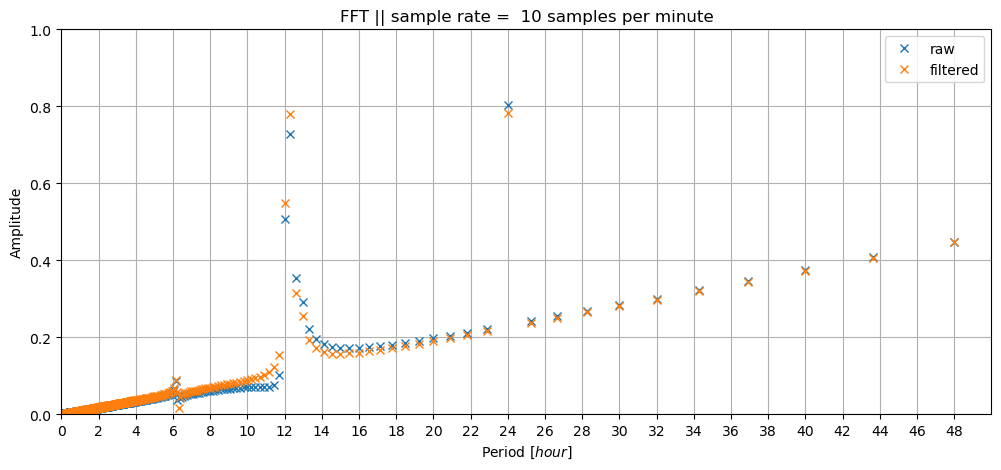

In [15]:
sampling_rates = [1, 5, 10]
days = 20
                       
                       
for SAMPLING_RATE in sampling_rates:
    
    # CREATING X
    
    x = np.arange(0, 60*60*24*days, SAMPLING_RATE)

    # DEFINING LINEAR TREND
    
    n = 0.1/(60*60*24)
    m = 0
    linear_trend = x*n + m
    
    # CALCULATING THE SIGNALS
    
    whole_array = np.zeros(shape=(len(f_list), len(x)))

    for i in range(len(f_list)):

        white_noise = np.random.normal(0,0.05,size=len(x))  # 0.05 Standard deviation
        white_noise_phase = np.random.randint(low=-30, high=30)/30

        y = A_list[i] * np.sin((x)*(2*np.pi)*f_list[i]/(60*60*24)+white_noise_phase*np.pi) + white_noise + linear_trend

        locals()[variable_list[i]] = y 
        whole_array[i] = y
        
        
    # SUMMING UP THE SIGNALS 
    
    sum_time_series = np.sum(whole_array, axis=0)
    
    
    # DEFINING THE FILTER
    
    sec = 1/SAMPLING_RATE #SAMPLING RATE IN SEC
    high_freq_hour = 0.5
    low_freq_hour  = 30
    high_freq = 1/(high_freq_hour*60*sec) 
    low_freq  = 1/(low_freq_hour*60*sec)  

    sos = signal.butter(10, [low_freq], 'lowpass', output='sos')
    
    # PLOT
    
    sum_time_series_filtered = signal.sosfilt(sos, sum_time_series)


    fig, ax = plt.subplots(1, figsize=(12,7))

    ax.plot(x/(60*60*24), sum_time_series, label = 'Raw sum')
    ax.plot(x/(60*60*24), sum_time_series_filtered, label = 'Filtered')

    ax.set_xlabel('Days')
    ax.set_ylabel('Summed Amplitude')
    ax.set_title(r'$\sum$ all signals | sample rate =  {:} samples per minute'.format(SAMPLING_RATE))
    ax.legend()
    ax.set_xticks(np.arange(0,days,1))
    ax.grid()

    
    
    # FFT CALCULATE     

    X = np.fft.fft(sum_time_series_filtered)
    N = len(X)
    n = np.arange(N)
    # get the sampling rate
    sr = 1/SAMPLING_RATE
    T = N/sr
    freq = n/T 

    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    f_fftfreq = np.sort(np.fft.fftfreq(N))[int(N/2):]
    t_h = (1/f_fftfreq)*SAMPLING_RATE/(60*60)

    X_unfiltered = np.fft.fft(sum_time_series)
    
    # FFT PLOT
    
    fig, ax = plt.subplots(1, figsize=(12,5))
    ax.plot(t_h, np.abs(X_unfiltered[:n_oneside])/n_oneside, "x", label='raw')
    ax.plot(t_h, np.abs(X[:n_oneside])/n_oneside, "x", label= 'filtered')
    ax.set_xlabel('Period [$hour$]')
    ax.grid()
    ax.set_ylim(0,1)
    ax.set_xlim(0,50)
    ax.set_xticks(np.arange(0,50,2))
    ax.legend()
    ax.set_title('FFT || sample rate =  {:} samples per minute'.format(SAMPLING_RATE))
    ax.set_ylabel('Amplitude')

#fig.savefig('Output/6_sample_rate_fft.pdf',dpi=300)

C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\2946498515.py:42: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_fftfreq)*sec/(60*60)
C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\2946498515.py:93: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_fftfreq)*sec/(60*60)


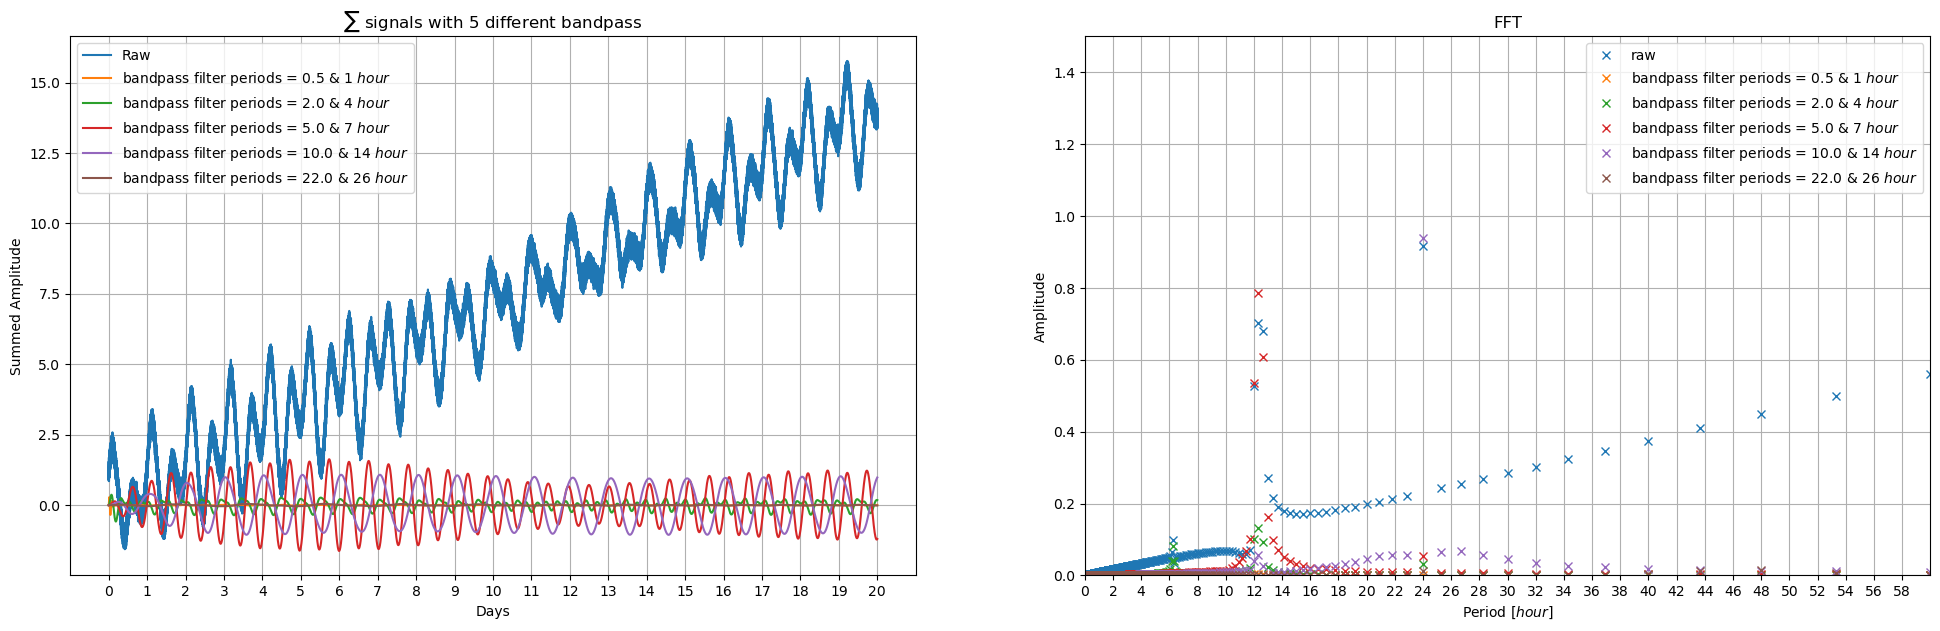

In [16]:
sec = 1 #SAMPLING RATE IN SEC
days= 20
high_freq_hour_array = np.array([0.5,2,5,10,22])
low_freq_hour_array  = np.array([1,4,7,14,26])



x = np.arange(0, days*60*60*24,sec)
n = 0.1/(60*60*24)
m = 0
linear_trend = x*n + m
whole_array = np.zeros(shape=(len(f_list), len(x)))

for i in range(len(f_list)):

    white_noise = np.random.normal(0,0.05,size=len(x))  # 0.05 Standard deviation
    white_noise_phase = np.random.randint(low=-30, high=30)/30

    y = A_list[i] * np.sin((x)*(2*np.pi)*f_list[i]/(60*60*24) + \
                           white_noise_phase*np.pi) + white_noise + linear_trend
    whole_array[i] = y

sum_time_series = np.sum(whole_array, axis=0)


# FFT CALCULATE     

X_raw = np.fft.fft(sum_time_series)
N = len(X_raw)
n = np.arange(N)
# get the sampling rate
sr = sec
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

f_fftfreq = np.sort(np.fft.fftfreq(N))[int(N/2):]
t_h = (1/f_fftfreq)*sec/(60*60)

fig, axes = plt.subplots(1,2, figsize=(24,7))

ax = axes[0]
ax.plot(x/(60*60*24), sum_time_series, label = 'Raw')

ax= axes[1]
ax.plot(t_h, np.abs(X_raw[:n_oneside])/n_oneside, "x", label='raw')


for i in range(len(high_freq_hour_array)):
    
    high_freq_hour = high_freq_hour_array[i]
    low_freq_hour = low_freq_hour_array[i]
    
    high_freq = 1/(high_freq_hour*60*60*sec) 
    low_freq  = 1/(low_freq_hour*60*60*sec)  

    sos = signal.butter(2, [low_freq, high_freq], btype='bandpass', output='sos')

    
    sum_time_series_filtered = signal.sosfilt(sos, sum_time_series)
    
    # PLOT

    ax = axes[0]

    ax.plot(x/(60*60*24), sum_time_series_filtered, 
            label = 'bandpass filter periods = {:} & {:} $hour$'.format(high_freq_hour,low_freq_hour))


    # FFT CALCULATE

    X_raw = np.fft.fft(sum_time_series)
    X_filtered = np.fft.fft(sum_time_series_filtered)


    N = len(X_raw)
    n = np.arange(N)
    # get the sampling rate
    sr = sec
    T = N/sr
    freq = n/T 

    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    f_fftfreq = np.sort(np.fft.fftfreq(N))[int(N/2):]
    t_h = (1/f_fftfreq)*sec/(60*60)

    #FFT PLOT

    ax = axes[1]

    ax.plot(t_h, np.abs(X_filtered[:n_oneside])/n_oneside, "x", 
            label= 'bandpass filter periods = {:} & {:} $hour$'.format(high_freq_hour,low_freq_hour))

    
ax = axes [0]
ax.set_xlabel('Days')
ax.set_ylabel('Summed Amplitude')
ax.set_title(r'$\sum$ signals with {:} different bandpass'.format(len(high_freq_hour_array)))
ax.legend()
ax.set_xticks(np.arange(0,days+1,1))
ax.grid()    

ax = axes[1]
ax.set_xlabel('Period [$hour$]')
ax.grid()
ax.set_ylim(0,1.5)
ax.set_xlim(0,60)
ax.set_xticks(np.arange(0,60,2))
ax.legend()
ax.set_title('FFT')
ax.set_ylabel('Amplitude')



#fig.savefig('Output/8_Different_bandpass.png', dpi=150)

C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\4288636554.py:42: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_fftfreq)*sec/(60*60)
C:\Users\Memo\AppData\Local\Temp\ipykernel_13588\4288636554.py:93: RuntimeWarning: divide by zero encountered in true_divide
  t_h = (1/f_fftfreq)*sec/(60*60)


Text(0, 0.5, 'Amplitude')

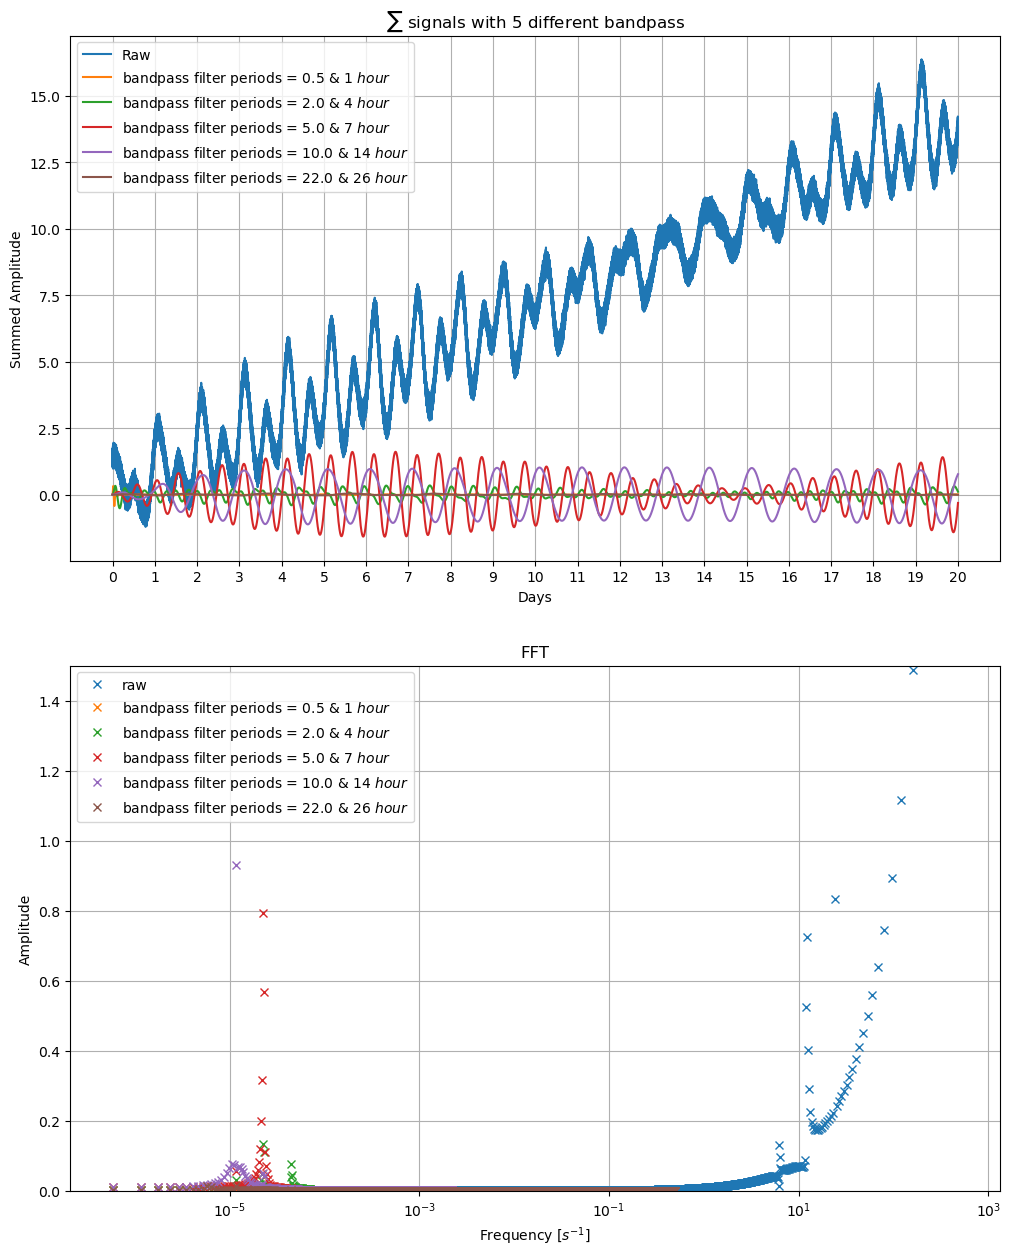

In [17]:
sec = 1 #SAMPLING RATE IN SEC
days= 20
high_freq_hour_array = np.array([0.5,2,5,10,22])
low_freq_hour_array  = np.array([1,4,7,14,26])



x = np.arange(0, days*60*60*24,sec)
n = 0.1/(60*60*24)
m = 0
linear_trend = x*n + m
whole_array = np.zeros(shape=(len(f_list), len(x)))

for i in range(len(f_list)):

    white_noise = np.random.normal(0,0.05,size=len(x))  # 0.05 Standard deviation
    white_noise_phase = np.random.randint(low=-30, high=30)/30

    y = A_list[i] * np.sin((x)*(2*np.pi)*f_list[i]/(60*60*24) + \
                           white_noise_phase*np.pi) + white_noise + linear_trend
    whole_array[i] = y

sum_time_series = np.sum(whole_array, axis=0)


# FFT CALCULATE     

X_raw = np.fft.fft(sum_time_series)
N = len(X_raw)
n = np.arange(N)
# get the sampling rate
sr = sec
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

f_fftfreq = np.sort(np.fft.fftfreq(N))[int(N/2):]
t_h = (1/f_fftfreq)*sec/(60*60)

fig, axes = plt.subplots(2, figsize=(12,15))

ax = axes[0]
ax.plot(x/(60*60*24), sum_time_series, label = 'Raw')

ax= axes[1]
ax.plot(t_h, np.abs(X_raw[:n_oneside])/n_oneside, "x", label='raw')


for i in range(len(high_freq_hour_array)):
    
    high_freq_hour = high_freq_hour_array[i]
    low_freq_hour = low_freq_hour_array[i]
    
    high_freq = 1/(high_freq_hour*60*60*sec) 
    low_freq  = 1/(low_freq_hour*60*60*sec)  

    sos = signal.butter(2, [low_freq, high_freq], btype='bandpass', output='sos')

    
    sum_time_series_filtered = signal.sosfilt(sos, sum_time_series)
    
    # PLOT

    ax = axes[0]

    ax.plot(x/(60*60*24), sum_time_series_filtered, 
            label = 'bandpass filter periods = {:} & {:} $hour$'.format(high_freq_hour,low_freq_hour))


    # FFT CALCULATE

    X_raw = np.fft.fft(sum_time_series)
    X_filtered = np.fft.fft(sum_time_series_filtered)


    N = len(X_raw)
    n = np.arange(N)
    # get the sampling rate
    sr = sec
    T = N/sr
    freq = n/T 

    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    f_fftfreq = np.sort(np.fft.fftfreq(N))[int(N/2):]
    t_h = (1/f_fftfreq)*sec/(60*60)

    #FFT PLOT

    ax = axes[1]

    ax.plot(f_oneside, np.abs(X_filtered[:n_oneside])/n_oneside, "x", 
            label= 'bandpass filter periods = {:} & {:} $hour$'.format(high_freq_hour,low_freq_hour))

    
ax = axes [0]
ax.set_xlabel('Days')
ax.set_ylabel('Summed Amplitude')
ax.set_title(r'$\sum$ signals with {:} different bandpass'.format(len(high_freq_hour_array)))
ax.legend()
ax.set_xticks(np.arange(0,days+1,1))
ax.grid()    


ax = axes[1]
ax.set_xscale("log")
ax.set_xlabel('Frequency [$s^{-1}$]')
ax.grid()
ax.set_ylim(0,1.5)
ax.legend()
ax.set_title('FFT')
ax.set_ylabel('Amplitude')



#fig.savefig('Output/8_Different_bandpass.png', dpi=150)